In [2]:
import pandas as pd
import numpy as np

In [3]:
# file = 'C:\\Users\\SIMGEK\\Desktop\\BOUN\\ETM58D - Business Analytics\\HW0203\\GercekZamanliTuketim.csv'
df = pd.read_csv('GercekZamanliTuketim.csv', sep=';')
df.head()

,Date,Hour,Value
0,1.01.2016,00:00,26277.24
1,1.01.2016,01:00,24991.82
2,1.01.2016,02:00,23532.61
3,1.01.2016,03:00,22464.78
4,1.01.2016,04:00,22002.91


In [4]:
df.dtypes

Date      object
Hour      object
Value    float64
dtype: object

In [5]:
df.shape

(38400, 3)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Hour'] = pd.to_datetime(df['Hour'], infer_datetime_format=True)
df['Hour'] = df['Hour'].dt.hour

In [7]:
df.dtypes

Date     datetime64[ns]
Hour              int64
Value           float64
dtype: object

In [8]:
df.head()

,Date,Hour,Value
0,2016-01-01,0,26277.24
1,2016-01-01,1,24991.82
2,2016-01-01,2,23532.61
3,2016-01-01,3,22464.78
4,2016-01-01,4,22002.91


In [9]:
df['Value_Lag_48'] = df['Value'].shift(48)
df['Value_Lag_168'] = df['Value'].shift(168)

In [10]:
df.head(50)

,Date,Hour,Value,Value_Lag_48,Value_Lag_168
0,2016-01-01,0,26277.24,NaN,NaN
1,2016-01-01,1,24991.82,NaN,NaN
2,2016-01-01,2,23532.61,NaN,NaN
3,2016-01-01,3,22464.78,NaN,NaN
4,2016-01-01,4,22002.91,NaN,NaN
5,2016-01-01,5,21957.08,NaN,NaN
6,2016-01-01,6,22203.54,NaN,NaN
7,2016-01-01,7,21844.16,NaN,NaN
8,2016-01-01,8,23094.73,NaN,NaN
9,2016-01-01,9,25202.27,NaN,NaN


In [11]:
full_data = df.copy()
full_data = full_data.dropna()
full_data.shape

(38232, 5)

In [12]:
full_data.head()

,Date,Hour,Value,Value_Lag_48,Value_Lag_168
168,2016-08-01,0,28602.02,29189.27,26277.24
169,2016-08-01,1,27112.37,27614.02,24991.82
170,2016-08-01,2,25975.34,26578.97,23532.61
171,2016-08-01,3,25315.55,25719.19,22464.78
172,2016-08-01,4,25128.15,25864.63,22002.91


In [13]:
df_train = full_data[full_data['Date'] < '2020-03-01']
df_test = full_data[full_data['Date'] >= '2020-03-01']

Part a

In [14]:
df_test['Abs_Perc_Err_48'] = ((df_test['Value'] - df_test['Value_Lag_48'])/df_test['Value'])*100
df_test['Abs_Perc_Err_48'] = df_test['Abs_Perc_Err_48'].abs()

df_test['Abs_Perc_Err_168'] = ((df_test['Value'] - df_test['Value_Lag_168'])/df_test['Value'])*100
df_test['Abs_Perc_Err_168'] = df_test['Abs_Perc_Err_168'].abs()

C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [15]:
df_test.head()

,Date,Hour,Value,Value_Lag_48,Value_Lag_168,Abs_Perc_Err_48,Abs_Perc_Err_168
35088,2020-03-01,0,32285.62,28125.46,32849.96,12.885489,1.747961
35089,2020-03-01,1,30433.66,26548.41,30988.26,12.766292,1.822324
35090,2020-03-01,2,29163.80,25287.99,29746.70,13.289798,1.998711
35091,2020-03-01,3,28554.01,24311.53,28890.64,14.857738,1.178924
35092,2020-03-01,4,28446.72,23730.48,28798.24,16.579205,1.235714


In [16]:
df_test[['Abs_Perc_Err_48','Abs_Perc_Err_168']].describe()

,Abs_Perc_Err_48,Abs_Perc_Err_168
count,2256.000000,2256.000000
mean,9.250938,5.644190
std,9.900348,5.434518
min,0.000835,0.003992
25%,2.039332,1.674484
50%,6.038840,4.119448
75%,12.168130,7.998670
max,56.267445,38.561406


MAPE is 9.250938 for prediction with 2 days lag, 
MAPE is 5.644190 for prediction with 7 days lag

In [17]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x27c98c4bd48>,
 'caps': [<matplotlib.lines.Line2D at 0x27c98c4bec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c98c45a48>],
 'medians': [<matplotlib.lines.Line2D at 0x27c98c55f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c98c5af48>],
 'means': []}

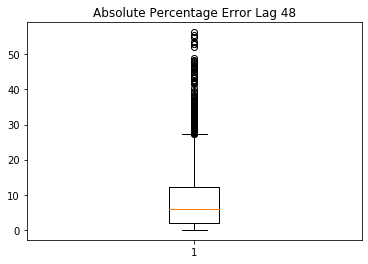

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Absolute Percentage Error Lag 48')
ax1.boxplot(df_test['Abs_Perc_Err_48'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27c99cc8348>,
 'caps': [<matplotlib.lines.Line2D at 0x27c99cc8bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c99cc47c8>],
 'medians': [<matplotlib.lines.Line2D at 0x27c99ccdb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c99cd1bc8>],
 'means': []}

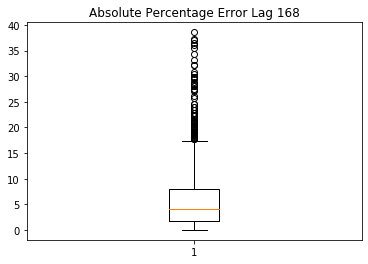

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Absolute Percentage Error Lag 168')
ax1.boxplot(df_test['Abs_Perc_Err_168'])

Part b

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X_train = df_train[['Value_Lag_48','Value_Lag_168']]
y_train = df_train[['Value']]

X_test = df_test[['Value_Lag_48','Value_Lag_168']]
y_test = df_test[['Value']]

In [22]:
model = LinearRegression().fit(X_train,y_train)

In [23]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [1615.99664949]
Coefficients: [[0.311938   0.63839504]]


In [24]:
df_test['Predicted_Consumption'] = model.intercept_ + df_test['Value_Lag_48']*model.coef_[0][0] + df_test['Value_Lag_168']*model.coef_[0][1]

C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_test['Abs_Perc_Err'] = ((df_test['Value'] - df_test['Predicted_Consumption'])/df_test['Value'])*100
df_test['Abs_Perc_Err'] = df_test['Abs_Perc_Err'].abs()

C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df_test[['Date','Hour','Value_Lag_48','Value_Lag_168','Value','Predicted_Consumption','Abs_Perc_Err']]

,Date,Hour,Value_Lag_48,Value_Lag_168,Value,Predicted_Consumption,Abs_Perc_Err
35088,2020-03-01,0,28125.46,32849.96,32285.62,31360.648018,2.864966
35089,2020-03-01,1,26548.41,30988.26,30433.66,29680.206144,2.475725
35090,2020-03-01,2,25287.99,29746.70,29163.80,28494.427500,2.295217
35091,2020-03-01,3,24311.53,28890.64,28554.01,27643.328060,3.189331
35092,2020-03-01,4,23730.48,28798.24,28446.72,27403.088783,3.668723
...,...,...,...,...,...,...,...
38395,2020-05-19,19,31802.96,32431.97,31670.85,32240.957272,1.800101
38396,2020-05-19,20,31481.96,31893.32,31370.75,31796.953684,1.358602
38397,2020-05-19,21,31349.23,32262.92,31577.82,31991.500961,1.310036
38398,2020-05-19,22,30657.57,31651.02,31040.66,31385.111997,1.109680


In [27]:
df_test['Abs_Perc_Err'].describe()

count    2256.000000
mean        5.461455
std         5.514035
min         0.001051
25%         1.715846
50%         3.855135
75%         7.363295
max        41.091701
Name: Abs_Perc_Err, dtype: float64

In [28]:
print('MAPE:', np.mean(df_test['Abs_Perc_Err']))

MAPE: 5.461454606795356


Part c

In [29]:
test_hourly = pd.DataFrame()

for i in df_train['Hour'].unique():
    df_hourly_train = df_train[df_train['Hour'] == i]
    X_train = df_hourly_train[['Value_Lag_48','Value_Lag_168']]
    y_train = df_hourly_train[['Value']]
        
    df_hourly_test = df_test[df_test['Hour'] == i]
#     X_test = df_hourly_test[['Value_Lag_48','Value_Lag_168']]
#     y_test = df_hourly_test[['Value']]
    
    model = LinearRegression().fit(X_train,y_train)
    
    df_hourly_test[i] = model.intercept_ + df_hourly_test['Value_Lag_48']*model.coef_[0][0] + df_hourly_test['Value_Lag_168']*model.coef_[0][1]
        
    test_hourly = test_hourly.append(df_hourly_test)
    

C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [30]:
err_list = []
errors_hourly = pd.DataFrame()

for i in test_hourly['Hour'].unique():
    temp = test_hourly[test_hourly['Hour'] == i]
    err_list = ((((temp['Value'] - temp[i])/temp['Value'])*100).abs()).to_list()
    errors_hourly['err_' + str(i)] = err_list

In [31]:
errors_hourly.head()

,err_0,err_1,err_2,err_3,err_4,err_5,err_6,err_7,err_8,err_9,...,err_14,err_15,err_16,err_17,err_18,err_19,err_20,err_21,err_22,err_23
0,5.852994,5.777762,5.987402,7.060527,7.622505,8.312764,7.628875,7.869783,7.727294,8.734742,...,10.258003,8.907055,8.622949,8.204341,7.522279,6.997904,6.989132,6.306598,6.248230,6.563964
1,5.685086,5.679297,5.856202,5.178736,5.037077,4.393047,2.921109,0.575183,0.429416,0.670733,...,2.237415,3.385315,3.282584,2.104371,1.071221,0.720829,1.079641,0.784541,1.140978,0.119147
2,0.432259,0.454858,0.824054,1.842942,2.403745,2.783593,3.727577,5.530032,8.300097,10.647660,...,13.876649,10.278859,8.484228,6.535418,3.640936,3.334351,3.087791,3.427212,3.564465,3.239477
3,3.101012,3.250481,2.729955,1.759936,1.618457,0.442365,2.345596,4.664124,6.860165,7.567975,...,10.087290,9.879629,9.640783,8.901367,7.084971,6.298372,5.888085,5.647520,5.936854,4.512748
4,3.032190,4.022784,5.090324,5.643619,6.326542,7.297364,8.279391,9.688334,11.850282,12.403787,...,16.513504,15.954582,16.073541,14.858194,12.638260,12.652983,13.129315,13.716154,14.481037,12.196773


In [32]:
errors_hourly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
err_0,94.0,3.657343,2.885691,0.048773,1.273486,3.100436,5.373429,14.407359
err_1,94.0,3.714371,2.801205,0.112201,1.523968,3.207363,5.223399,14.564427
err_2,94.0,3.820274,2.860919,0.094377,1.427727,3.471340,5.596720,14.004880
err_3,94.0,3.963766,2.954823,0.063913,1.430630,3.939531,5.635175,14.992204
err_4,94.0,3.979299,3.019375,0.080770,1.432499,3.590736,5.914814,15.180139
err_5,94.0,3.904050,3.132029,0.095057,1.444207,3.363499,5.479055,15.510012
err_6,94.0,4.422435,3.777734,0.012080,1.650068,3.602642,6.239903,17.977527
err_7,94.0,5.336523,4.838024,0.044007,1.320451,4.426819,7.868395,21.903856
err_8,94.0,7.260264,6.992077,0.019738,1.979237,6.369628,10.021801,33.975776
err_9,94.0,8.289025,8.146806,0.055541,2.141508,7.039561,10.472137,43.468530


Part d

In [33]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [34]:
full_data.rename(columns={"Value_Lag_48": "Lag_day2", "Value_Lag_168": "Lag_day7"}, inplace = True)

In [35]:
full_data.head()

,Date,Hour,Value,Lag_day2,Lag_day7
168,2016-08-01,0,28602.02,29189.27,26277.24
169,2016-08-01,1,27112.37,27614.02,24991.82
170,2016-08-01,2,25975.34,26578.97,23532.61
171,2016-08-01,3,25315.55,25719.19,22464.78
172,2016-08-01,4,25128.15,25864.63,22002.91


In [36]:
full_data_wide = full_data.pivot(index='Date', columns='Hour').reset_index()
full_data_wide.head()

Date     Value                                                    \
Hour                    0         1         2         3         4         5   
0    2016-01-02  27257.80  25692.59  24501.95  23973.46  23854.61  24195.66   
1    2016-01-03  27186.07  25679.76  24743.83  24405.31  24226.34  24727.59   
2    2016-01-04  28668.70  27088.01  26088.12  25487.10  25456.17  25863.30   
3    2016-01-05  26936.26  25629.65  24527.90  23673.93  23353.26  22219.82   
4    2016-01-06  28376.23  26746.09  25697.47  25062.99  24923.33  24205.53   

                                    ...  Lag_day7                      \
Hour         6         7         8  ...        14        15        16   
0     25096.25  26488.24  32138.83  ...  40025.60  39686.93  39815.53   
1     24855.56  26277.09  30448.14  ...  33422.62  33069.43  33315.14   
2     26033.30  27445.54  31497.83  ...  32732.98  32636.86  32719.97   
3     21375.04  21885.64  23462.05  ...  26371.57  26083.04  25686.47   
4     24592.42  26508.98  30881.02  ...  33379.81  33208.70  33082.03   

                                                                            
Hour        17        18        19        20        21        22        23  
0     40446.48  38716.68  36907.14  35987.80  34823.23  34860.72  33253.80  
1     33823.72  34187.95  33352.47  32431.00  31436.04  31493.61  29763.68  
2     33015.57  33708.88  33221.12  32290.36  31596.58  31428.85  29807.57  
3     25436.66  25856.96  27766.95  29566.62  29181.18  29122.24  27676.81  
4     32085.49  30990.21  30947.38  32405.06  32093.26  31508.64  29783.46  

[5 rows x 73 columns]

In [37]:
df_train_wide = full_data_wide[full_data_wide['Date'] < '2020-03-01']
df_test_wide = full_data_wide[full_data_wide['Date'] >= '2020-03-01']

In [38]:
## Create feature datasets

X_train_wd = pd.DataFrame()
X_test_wd = pd.DataFrame()

for i in full_data_wide['Value'].columns:

    X_train_wd['Lag_day2_'+str(i)] = df_train_wide['Lag_day2'][i]
    X_train_wd['Lag_day7_'+str(i)] = df_train_wide['Lag_day7'][i]
    
    X_test_wd['Lag_day2_'+str(i)] = df_test_wide['Lag_day2'][i]
    X_test_wd['Lag_day7_'+str(i)] = df_test_wide['Lag_day7'][i]
    

In [40]:
hour=[]
alpha=[]
mape=[]
coef=[]

for i in full_data_wide['Value'].columns:

    ## Create Train Target
    y_train_wd = df_train_wide['Value'][i]
    
    ## Create Test Target
    y_test_wd = df_test_wide['Value'][i]
    
    # Parameters
    lassocv = LassoCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1,
                        3, 6, 10, 50, 100, 1000, 5000, 10000, 50000, 100000],  max_iter=100000, cv=10, random_state=1881)

    lassocv.fit(X_train_wd, y_train_wd)
#     print("Best parameter alpha for hour: " + str(i) +": "+ str(lassocv.alpha_))

    lassoReg = Lasso(alpha=lassocv.alpha_)
    lassoReg.fit(X_train_wd, y_train_wd)

#     print("Mean Absolute Percentage Error = ", np.mean((((y_test_wd - lasso.predict(X_test_wd)) / y_test_wd)*100).abs()))
    
    hour.append(i)
    alpha.append(lassocv.alpha_)
    mape.append(np.mean((((y_test_wd - lassoReg.predict(X_test_wd)) / y_test_wd)*100).abs()))
    coef.append(lassoReg.coef_)
    

C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5698237.6567697525, tolerance: 1216211.5774815194
  positive)
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6665065.79089272, tolerance: 1157522.9078817132
  positive)
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27725048.543064833, tolerance: 1078470.56621306
  positive)
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

In [41]:
column_names = ["Hour", "Alpha", "MAPE", "Coefficients"]
output = pd.DataFrame(columns = column_names)

## Append Results to DataFrame
output['Hour'] = hour
output['Alpha'] = alpha
output['MAPE'] = mape
output['Coefficients'] = coef

In [42]:
output

,Hour,Alpha,MAPE,Coefficients
0,0,5000.0,2.468053,"[-0.22397869412025184, 0.12853231493325104, -0..."
1,1,5000.0,2.567257,"[-0.4380731508173127, 0.0, -0.0, 0.06284436464..."
2,2,5000.0,2.803086,"[-0.6199677437964144, 0.0017046556226419244, -..."
3,3,5000.0,2.937296,"[-0.6270558681065611, 0.0, -0.1288415424662458..."
4,4,5000.0,3.057795,"[-0.5414401315331687, 0.0, -0.3006354011346282..."
5,5,5000.0,3.280632,"[-0.5542465254010044, 0.0, -0.2401333597660504..."
6,6,5000.0,4.166393,"[-0.5713271694905173, -0.0, -0.116692945947618..."
7,7,5000.0,5.547291,"[-0.5593981857021274, 0.01303969260659512, -0...."
8,8,10000.0,7.875566,"[-0.9995836841748121, 0.08952629339786881, -0...."
9,9,10000.0,8.834106,"[-1.0098696793039763, 0.14053159473318477, -0...."


In [44]:
output['MAPE'].describe()

count    24.000000
mean      5.436897
std       2.399172
min       2.468053
25%       3.380900
50%       4.541087
75%       7.973396
max       8.902613
Name: MAPE, dtype: float64

With lasso regression I used 48 features to predict hourly consumptions. It aoutomatically selects the significant coeffients and did not use some of them as we can see from output table. There are coefficients with 0 weights.

When I checked the MAPE of the hourly predictions it shows similarity to other parts.